In [1]:
import numpy as np
from scipy.optimize import minimize, Bounds
import matplotlib.pyplot as plt

In [5]:
W = 10
L = 10
H = 10

3.141592653589793

In [4]:
def cost(n, z):
    return 895*n + (3+0.25*H)*n*(100+15*(H-z))

In [7]:
# Constraints

# variables: n, xf, yf, zf
position_bounds = Bounds([0,0,0], [W, L, H])
number_bounds = Bounds(0, np.inf)
intensity_bounds = Bounds(300, 500)

def light_intensity(n, x, y, xf, yf, zf):
    intensity = 0
    for i in range(1, n+1):
        intensity += 70661/(4*np.pi*(zf[i]**2+(x-xf[i])**2+(y-yf[i])**2))
    return intensity

In [36]:
def get_points(n):
    perimeter = 2*W + 2*H
    spacing = perimeter/n
    x = []
    y = []
    posn = [0,0]
    
    for i in range(n):
        if posn[0] < W:
            if spacing <= W and (posn[0] + spacing) <= W:
                x0 = spacing
                y0 = posn[1]
            else:
                x0 = W
                y0 = spacing - posn[0]
        else:
            if spacing <= H and (posn[1] + spacing) <= H:
                x0 = posn[0]
                y0 = spacing
            else:
                x0 = H - posn[1]
                y0 = H
        if x0 == W and y0 == H:
            x0, y0 = 0, 0
        x.append(x0)
        y.append(y0)
        posn = [x0, y0]
#         print(posn)
    return zip(x, y)

In [38]:
W = 20
H = 10
points = get_points(4)
for i in points:
    print(i)

(15.0, 0)
(20, 0.0)
(10.0, 10)
(20, 5.0)


In [27]:
60/4

15.0

In [14]:
# Given, meters
h = 1
l = 20
w = 19
unit_price = 895
watts = 70661

# Constraints
min_z = 2
max_z = h
min_i = 300
max_i = 500

# Variables
# position, in metres of each light
num_lights = 0
pos_x = []
pos_y = []
pos_z = 4

# This funct is given point_x and point_y in m
def get_lux(point_x, point_y, n):
    i = 0
    for m in range(n):
        i += watts / ((4 * np.pi) * (pos_z**2 + (point_x - pos_x[m])**2 + (point_y - pos_y[m])**2))
    return i

def set_starting_points(n):
    pos_x = []
    pos_y = []
    p = (l+w)*2

    seg = p/n

    for i in range(n):
        dist = seg*i

        if dist <= l:
            pos_x.append(dist)
            pos_y.append(0)
        elif l < dist <= l+w:
            pos_x.append(l)
            pos_y.append(dist-l)
        elif l+w < dist <= (2*l)+w:
            pos_x.append(l-(dist-(l+w)))
            pos_y.append(w)
        elif (2*l)+w < dist:
            pos_x.append(0)
            pos_y.append(w-(dist-((2*l)+w)))
    print("starting point: ", pos_x, pos_y)
    return pos_x, pos_y

def move_lights(n):
    mid_x = l*0.5
    mid_y = w*0.5
    for i in range(n):
        x = pos_x[i]
        y = pos_y[i]

        if mid_x > x:
            pos_x[i] += 0.01
        elif mid_x < x:
            pos_x[i] -= 0.01

        if mid_y > y:
            pos_y[i] += 0.01
        elif mid_y < y:
            pos_y[i] -= 0.01
    return

def move(n, mid_x, mid_y):
    for i in range(n):
        x0 = pos_x[i]
        y0 = pos_y[i]
        try:
            if x0-0.1 <= mid_x <= x0+0.1 or y0-0.1 <= mid_y <= y0+0.1:
                print("add a light!")
                return False

            if x0 < mid_x:
                x = x0+0.01
                y = ((mid_y-y0)/(mid_x-x0))*(x-x0) + y0
            else: # x0 > mid_x:
                x = x0-0.01
                y = ((mid_y-y0)/(mid_x-x0))*(x-x0) + y0
    #         print(x, mid_x, y, mid_y)
    #         if x-1 <= mid_x <= x+1 and y-1 <= mid_y <= y+1:
    #             print("add a light!")
    #             return False
        except:
            print(mid_x, x0, x0-0.1<=mid_x<=x0+0.1)
            raise ValueError
        
        pos_x[i] = x
        pos_y[i] = y
#         print(pos_x, pos_y)
    return True

def get_hours():
    hours = 3 * (0.25 * h)
    return hours

def get_labor_cost(n):
    time = get_hours()
    cost = time * n * (100 + (15 * (h - pos_z)))
    return cost

starting point:  [0.0] [0]
add a light!
starting point:  [0.0, 20] [0, 19.0]
add a light!
starting point:  [0.0, 20, 7.0] [0, 6.0, 19]
add a light!
starting point:  [0.0, 19.5, 20, 0.5] [0, 0, 19.0, 19]
add a light!
starting point:  [0.0, 15.6, 20, 12.200000000000003, 0] [0, 0, 11.2, 19, 15.600000000000001]
add a light!
starting point:  [0.0, 13.0, 20, 20, 7.0, 0] [0, 0, 6.0, 19.0, 19, 13.0]
add a light!
starting point:  [0.0, 11.142857142857142, 20, 20, 14.42857142857143, 3.285714285714292, 0] [0, 0, 2.2857142857142847, 13.42857142857143, 19, 19, 11.142857142857139]


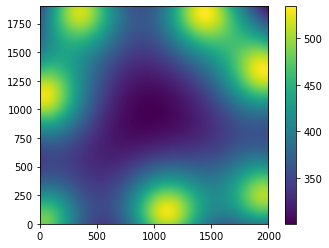

num_lights: 7
pos_x: [0.10999999999999999, 11.032857142857145, 19.889999999999983, 19.889999999999983, 14.318571428571433, 3.3957142857142895, 0.10999999999999999]
pos_y: [0.10449999999999998, 0.9143749999999808, 2.3650714285714387, 13.385357142857137, 18.764032258064535, 18.844361702127667, 11.124785714285716]


In [15]:
def f(n):
    function = unit_price * n + get_labor_cost(n)
    return function

def heatmap2d(arr: np.ndarray, data_x, data_y):
#     plt.plot(data_x, data_y, 'o')
    plt.imshow(arr.T, cmap='viridis')
    plt.colorbar()
#     plt.plot(data_x, data_y, 'o')
    plt.xlim(0,l*100)
    plt.ylim(0,w*100)
    plt.show()
    
def movement(data_x, data_y):
    for i in range(len(data_x)):
        plt.scatter(data_x[i], data_y[i])
    plt.xlim(0,l)
    plt.ylim(0,w)
    plt.show()

# Room is a 2d array of lxw, in cm, at reading level
room = np.zeros(shape=(l*100, w*100))
path_x = []
path_y = []
# print(path)
width = room.shape[1]
length = room.shape[0]

n=0
passed = False
while not passed:
    n += 1
    pos_x, pos_y = set_starting_points(n)
    path_x.append(np.zeros(w*100))
    path_y.append(np.zeros(w*100))

    done = False
    while not done:
        for j in range(0, length):
            for k in range(0, width):
                lux = get_lux(j/100, k/100, n)
                room[j, k] = lux  # pass meters to get_lux
                if lux < min_i:
#                     move_lights(n)
                    if not move(n, l*0.5, w*0.5):
                        done = True
                    for fixture in range(n):
                        path_x[fixture][k] = pos_x[fixture]
                        path_y[fixture][k] = pos_y[fixture]
                    passed = False
                    break
            else:
                continue
            break
        else:
            passed = True
            done = True

heatmap2d(room, path_x, path_y)
# movement(path_x, path_y)

print("num_lights: " + str(n))
print("pos_x: " + str(pos_x))
print("pos_y: " + str(pos_y))

(600,)

In [73]:
array = [0, 0, 0]
array[0] = [2,2]

In [74]:
array

[[2, 2], 0, 0]

In [115]:
def move(n, pos_x, pos_y, mid_x, mid_y):
    for i in range(n):
        x0 = pos_x[i]
        y0 = pos_y[i]
        if x0 < mid_x:
            x = x0+0.01
            y = ((mid_y-y0)/(mid_x-x0))*(x-x0) + y0
        elif x0 > mid_x:
            x = x0-0.01
            y = ((mid_y-y0)/(mid_x-x0))*(x-x0) + y0
        else:
            x = mid_x
            y = mid_y
        pos_x[i] = x
        pos_y[i] = y
    return pos_x, pos_y

In [117]:
move(2, [0.01,9.99],[0.02,19.98], 5, 10)

0
less 0.01
1
more 9.99 19.98


([0.02, 9.98], [0.04, 19.96])

In [165]:
test = []

In [166]:
test.append([])

In [168]:
test.append([])

In [169]:
test

[[], []]

In [171]:
path_x.shape

(1000,)

### Clean

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# Given, meters
h = 1
l = 4
w = 3
unit_price = 895
watts = 70661

# Constraints
min_z = 2
max_z = h
min_i = 300
max_i = 500

# Variables
# position, in metres of each light
num_lights = 0
# pos_x = []
# pos_y = []
pos_z = 4

path_x = []
path_y = []

In [56]:
def get_lux(point_x, point_y, n, pos_x, pos_y):
    i = 0
    for m in range(n):
        i += watts / ((4 * np.pi) * (pos_z**2 + (point_x - pos_x[m])**2 + (point_y - pos_y[m])**2))
    return i

def set_starting_points(n):
    pos_x = []
    pos_y = []
    p = (l+w)*2

    seg = p/n

    for i in range(n):
        dist = seg*i

        if dist <= l:
            pos_x.append(dist)
            pos_y.append(0)
        elif l < dist <= l+w:
            pos_x.append(l)
            pos_y.append(dist-l)
        elif l+w < dist <= (2*l)+w:
            pos_x.append(l-(dist-(l+w)))
            pos_y.append(w)
        elif (2*l)+w < dist:
            pos_x.append(0)
            pos_y.append(w-(dist-((2*l)+w)))
    print("starting points: ", pos_x, pos_y)
    return pos_x, pos_y

def move(n, mid_x, mid_y, pos_x, pos_y):
    for i in range(n):
        x0 = pos_x[i]
        y0 = pos_y[i]
        try:
            if x0-0.1 <= mid_x <= x0+0.1 or y0-0.1 <= mid_y <= y0+0.1:
                print("add a light!")
                return False

            if x0 < mid_x:
                x = x0+0.01
                y = ((mid_y-y0)/(mid_x-x0))*(x-x0) + y0
            else: # x0 > mid_x:
                x = x0-0.01
                y = ((mid_y-y0)/(mid_x-x0))*(x-x0) + y0
        except:
            print(mid_x, x0, x0-0.1<=mid_x<=x0+0.1)
            raise ValueError
        
        pos_x[i] = x
        pos_y[i] = y
    return True

In [46]:
# Plotting function
def heatmap2d(arr: np.ndarray):
    plt.imshow(arr.T, cmap='viridis')
    plt.colorbar()
    plt.xlim(0,l*100)
    plt.ylim(0,w*100)
    plt.show()

def gather_moves(n, k, path_x, path_y, pos_x, pos_y):
    for fixture in range(n):
        path_x[fixture][k] = pos_x[fixture]
        path_y[fixture][k] = pos_y[fixture]

In [50]:
def optimize_lights():
    # Room is a 2d array of lxw, in cm, at reading level
    room = np.zeros(shape=(l*100, w*100))
    width = room.shape[1]
    length = room.shape[0]
    path_x = []
    path_y = []

    n=0
    passed = False
    while not passed:
        n += 1
        pos_x, pos_y = set_starting_points(n)
        path_x.append(np.zeros(w*100))
        path_y.append(np.zeros(w*100))

        done = False
        while not done:
            for j in range(0, length):
                for k in range(0, width):
                    lux = get_lux(j/100, k/100, n, pos_x, pos_y)
                    room[j, k] = lux  # pass meters to get_lux
                    if lux < min_i:
                        if not move(n, l*0.5, w*0.5, pos_x, pos_y):
                            done = True
                        gather_moves(n, k, path_x, path_y, pos_x, pos_y) # for plotting
                        passed = False
                        break
                else:
                    continue
                break
            else:
                passed = True
                done = True
    return n, room, pos_x, pos_y

starting point:  [0.0] [0]
add a light!
starting point:  [0.0, 10] [0, 7.0]
add a light!
starting point:  [0.0, 10, 4.333333333333332] [0, 1.333333333333334, 7]
add a light!
starting point:  [0.0, 8.5, 10, 1.5] [0, 0, 7.0, 7]


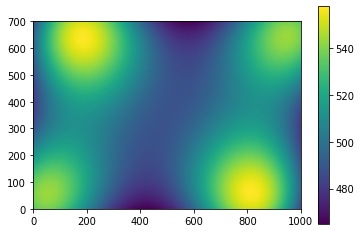

Number of lights: 4
Fixture 1: (0.0, 0)
Fixture 2: (8.5, 0)
Fixture 3: (10, 7.0)
Fixture 4: (1.5, 7)


In [55]:
# variables (more accessible)
h = 1
l = 10
w = 7

num_lights, room_lux, end_x, end_y = optimize_lights()

heatmap2d(room_lux)

print("Number of lights: " + str(num_lights))
for i, point in enumerate(zip(end_x, end_y)):
    print("Fixture {}: {}".format(i+1, point))